In [2]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
data = []
results_dir = "/srv/rl2-lab/flash8/rbansal66/openpi_rollout/openpi/data/libero"

# List of horizon folders to process
horizon_folders = ["horizon_10", "horizon_25", "horizon_50", "horizon_100"]

for folder in horizon_folders:
    folder_path = os.path.join(results_dir, folder)
    csv_path = os.path.join(folder_path, "results_summary_old.csv")
    
    if os.path.exists(csv_path):
        # Read the CSV file
        df_temp = pd.read_csv(csv_path)
        
        # Filter out the OVERALL row and extract individual task data
        df_temp = df_temp[df_temp['task_id'] != 'OVERALL']
        
        # Add the data to our list
        for _, row in df_temp.iterrows():
            data.append({
                "action_horizon": row["action_horizon"],
                "task": row["task_description"], 
                "success_rate": row["success_rate"]
            })

df = pd.DataFrame(data)

In [17]:
# Data is already aggregated, so we can use it directly
success_rate = df[["action_horizon", "task", "success_rate"]].copy()

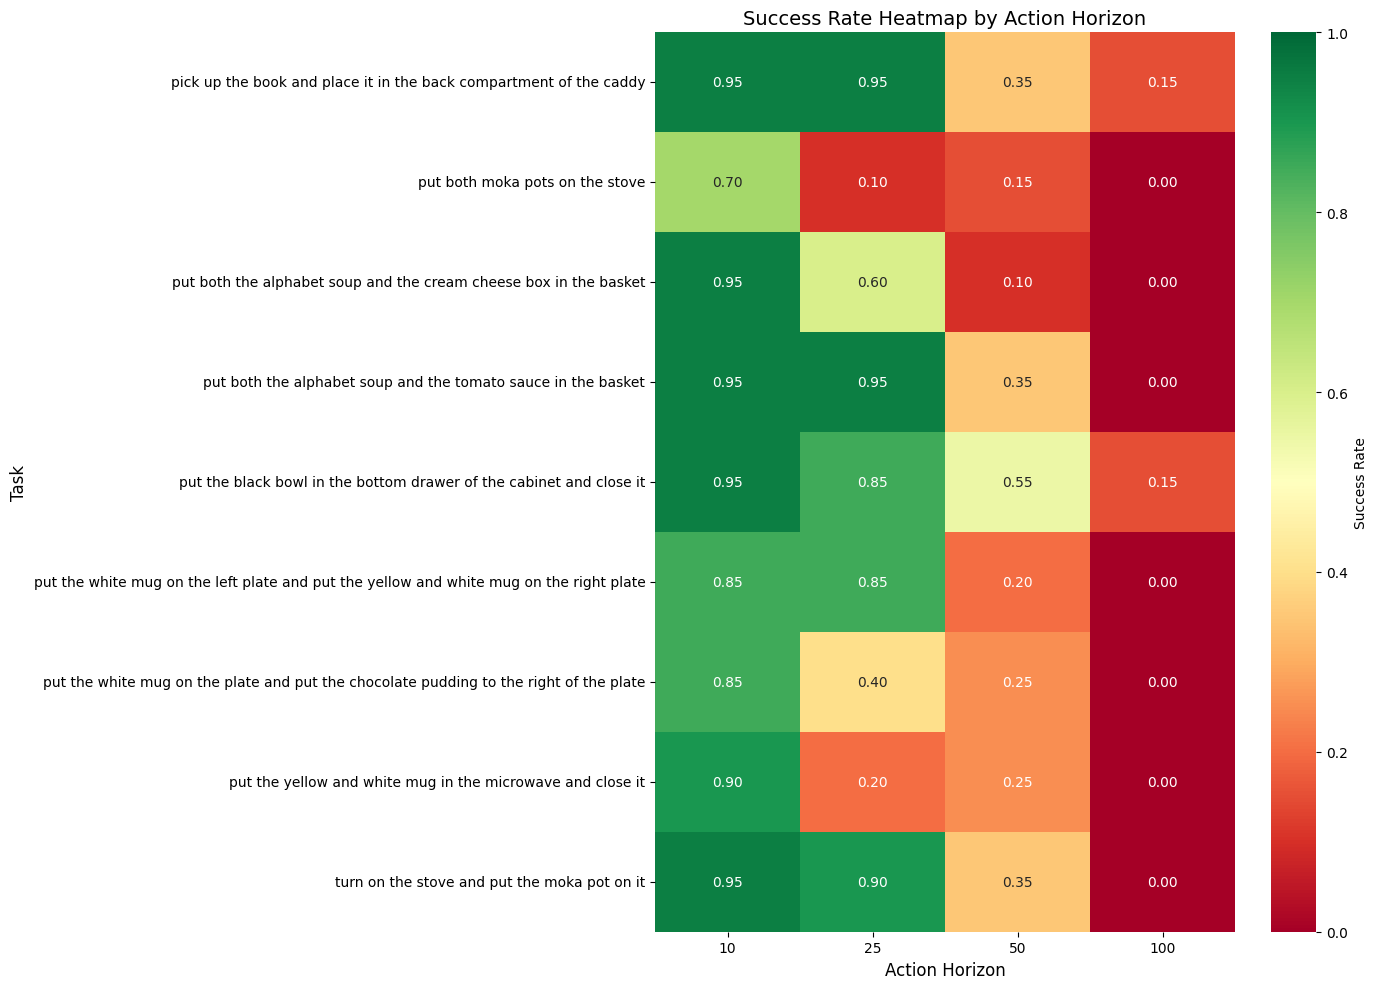

In [18]:
# Heatmap visualization
plt.figure(figsize=(14, 10))

pivot_data = success_rate.pivot(index='task', columns='action_horizon', values='success_rate')

sns.heatmap(pivot_data, annot=True, fmt='.2f', cmap='RdYlGn', 
            vmin=0, vmax=1, cbar_kws={'label': 'Success Rate'})

plt.xlabel('Action Horizon', fontsize=12)
plt.ylabel('Task', fontsize=12)
plt.title('Success Rate Heatmap by Action Horizon', fontsize=14)
plt.tight_layout()
plt.show()

In [ ]:
# Test: Display data summary and preview
print("Data shape:", df.shape)
print("\nAction horizons available:", sorted(df['action_horizon'].unique()))
print("\nNumber of tasks:", df['task'].nunique())
print("\nFirst few rows:")
print(df.head(10))

print("\nSuccess rate statistics by action horizon:")
print(df.groupby('action_horizon')['success_rate'].describe())
